<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models

# first try on building model like this
# 4-layers Convnet & 2-layers Fully connected Dense with MaxPooling no regulerzation and dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [8]:
from keras import optimizers
import tensorflow as tf

# change learning rate with LearningRateScheduler with callback fuction
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (1 - 9*epoch*1e-3))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

Using TensorFlow backend.


NameError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 20
epoch_lenth = 50
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

# cats and dogs data set downloaded from www.kaggle.com/c/dogs-vs-cats/data
# Using make_small_dataset.py separate small data set
# 2000 images as Training set
# 1000 images as Validation set
# 1000 images as Test set
train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

# normoalize pixel values
# no data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# create training set labels based on different direction
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

# create validation set labels based on different direction
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# try to traing this simple model 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/50
100/100 [==============================] - 106s 1s/step - loss: 0.6899 - acc: 0.5150 - val_loss: 0.6893 - val_acc: 0.6200
Epoch 2/50
100/100 [==============================] - 105s 1s/step - loss: 0.6573 - acc: 0.6100 - val_loss: 0.5995 - val_acc: 0.5930
Epoch 3/50
100/100 [==============================] - 105s 1s/step - loss: 0.6146 - acc: 0.6550 - val_loss: 0.6770 - val_acc: 0.6520
Epoch 4/50
100/100 [==============================] - 105s 1s/step - loss: 0.5666 - acc: 0.7025 - val_loss: 0.5833 - val_acc: 0.6700
Epoch 5/50
100/100 [==============================] - 105s 1s/step - loss: 0.5465 - acc: 0.7275 - val_loss: 0.4646 - val_acc: 0.6660
Epoch 6/50
100/100 [==============================] - 105s 1s/step - loss: 0.5177 - acc: 0.7490 - val_loss: 0.7646 - val_acc: 0.6360
Epoch 7/50
100/100 [==============================] - 105s 1s/step - loss: 0.5006 - acc: 0.7555 - val_loss: 0.6822 - val_acc: 0.6940
Epoch 8/50
100/100 [==============================] - 105s 1s/step - 

In [ ]:
model.save('cats_and_dogs_small_4C_2D_v1.h5')

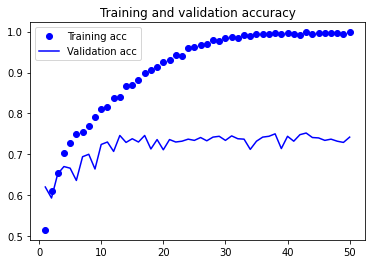

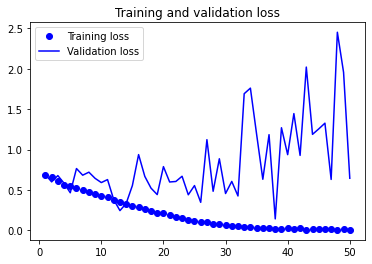

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The results shows that 
1. the model is overfitting on training set, since it has almost 100% accuracy on training data but only 74% on valdation data.
2. On the condition that there is no image augmentation, no regularzation, no dropout, training should stop after 14th epoch

In [ ]:
# aplying image augmentation to training set
# including 40 degree range for random rotations
# .2 fraction of total width/height shift
# .2 shear/zoom range
# allow horizontal flip
# points outside the boudaries of the input are filled according to the 'neareast' pixels

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

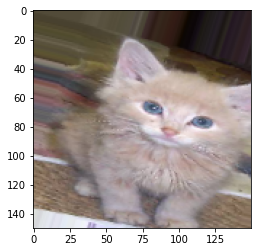

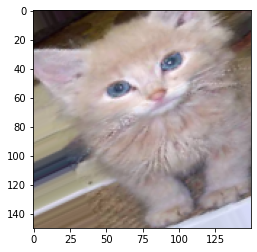

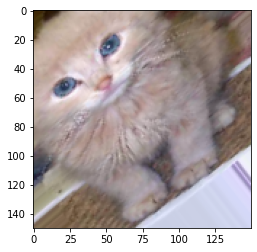

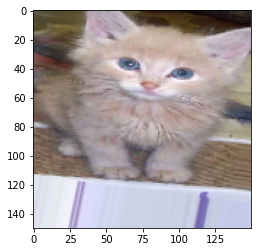

In [ ]:
from keras.preprocessing import image

# show the results of image augmentation
train_cats_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [ ]:
# build a new model with a dropout layer (drop out rate is 0.5)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 184s 2s/step - loss: 0.6920 - acc: 0.5201 - val_loss: 0.6725 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 177s 2s/step - loss: 0.6825 - acc: 0.5565 - val_loss: 0.7197 - val_acc: 0.5258
Epoch 3/100
100/100 [==============================] - 179s 2s/step - loss: 0.6692 - acc: 0.5969 - val_loss: 0.6611 - val_acc: 0.5755
Epoch 4/100
100/100 [==============================] - 179s 2s/step - loss: 0.6591 - acc: 0.6143 - val_loss: 0.6448 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 177s 2s/step - loss: 0.6427 - acc: 0.6301 - val_loss: 0.6204 - val_acc: 0.6643
Epoch 6/100
100/100 [==============================] - 181s 2s/step - loss: 0.6370 - acc: 0.6382 - val_loss: 0.5755 - val_acc: 0.7043
Epoch 7/100
100/100 [==============================] - 178s 2s/step - loss: 0.6089 - acc: 0.6667 - val_loss: 0.5616 - val_acc: 0.7005
Epoch 8/100
100/100 [==============================] - 180s 2s

In [ ]:
model.save('cats_and_dogs_small_4C_2D_dropout.h5')

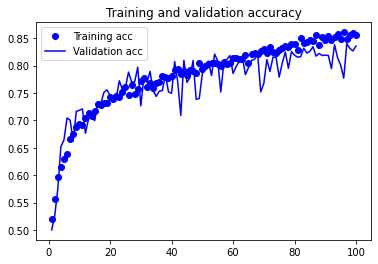

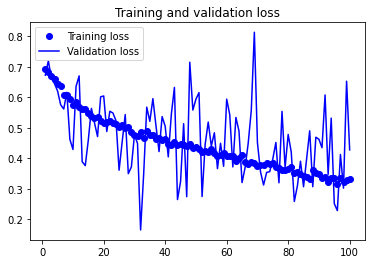

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

1. with the drop our rate at 0.5 overfitting on training set is solved, maybe I can try a smaller rate as 0.2
2. in this situation, the model still need to train further epochs, try 150 epochs next time
3. it looks like the batch size is small, since the validation loss curve has to much fluctuation

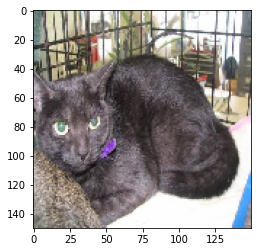

The image shows a cat.
Confidence is 1


In [ ]:
# try to out put prediction on the un-see images from test set
test_cats_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test/cats'
test_dogs_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test/dogs'
fnames_cat = [os.path.join(test_cats_dir, fname) for fname in os.listdir(test_cats_dir)]
fnames_dog = [os.path.join(test_dogs_dir, fname) for fname in os.listdir(test_dogs_dir)]

img_path = fnames_cat[12]
#img_path = fnames_dog[15]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

plt.figure(1)
imgplot = plt.imshow(image.array_to_img(x))
plt.show()

x = x.reshape((1,) + x.shape)
if int(model.predict(x)) > 0.5:
  print("The image shows a dog.")
  print("Confidence is " + str(int(model.predict(x))))
else:
  print("The image shows a cat.")
  print("Confidence is " + str(1 - int(model.predict(x))))

In [ ]:
# evaluate the model using two methdos
import numpy as np

test_set = fnames_cat + fnames_dog
len_t = len(test_set)

Y = np.zeros(len_t)
for i in range(int(len_t/2), len_t):
  Y[i] = 1

imgs = np.zeros((len_t, 150, 150, 3))

for i in range(len_t):
  imgs[i] = img = image.load_img(test_set[i], target_size=(150, 150))

imgs /= 255
print(imgs.shape)

(1000, 150, 150, 3)


In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test'

test_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test_generator)

Found 1000 images belonging to 2 classes.


[0.4968351423740387, 0.8130000233650208]

In [ ]:
model.evaluate(imgs, Y)

1000/1000 [==============================] - 12s 12ms/step


[0.43265925550460815, 0.8130000233650208]

1. the accuracy of two method is almost the same
2. but the loss are different, why？

In [9]:
# try .2 drop out rate
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-3),
metrics=['acc'])

In [10]:
from keras import optimizers
import tensorflow as tf

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (1 - 9*epoch*1e-3))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 40
epoch_lenth = 100
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

# cats and dogs data set downloaded from www.kaggle.com/c/dogs-vs-cats/data
# Using make_small_dataset.py separate small data set
# 2000 images as Training set
# 1000 images as Validation set
# 1000 images as Test set
train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# change learning rate with LearningRateScheduler with callback fuction
# lr start from 1e-3 end at 1e-4
# got this learning rate from tuning in v2 code
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/100
50/50 [==============================] - 757s 15s/step - loss: 0.7754 - acc: 0.5035 - val_loss: 0.6885 - val_acc: 0.5310
Epoch 2/100
50/50 [==============================] - 113s 2s/step - loss: 0.6966 - acc: 0.5435 - val_loss: 0.6898 - val_acc: 0.6230
Epoch 3/100
50/50 [==============================] - 113s 2s/step - loss: 0.6876 - acc: 0.5525 - val_loss: 0.6567 - val_acc: 0.5310
Epoch 4/100
50/50 [==============================] - 113s 2s/step - loss: 0.6844 - acc: 0.5645 - val_loss: 0.6877 - val_acc: 0.6220
Epoch 5/100
50/50 [==============================] - 113s 2s/step - loss: 0.7172 - acc: 0.6070 - val_loss: 0.6195 - val_acc: 0.6190
Epoch 6/100
50/50 [==============================] - 113s 2s/step - loss: 0.6528 - acc: 0.6245 - val_loss: 0.5994 - val_acc: 0.6890
Epoch 7/100
50/50 [==============================] - 113s 2s/step - loss: 0.6572 - acc: 0.6405 - val_loss: 0.4696 - val_acc: 0.6940
Epoch 8/100
50/50 [==============================] - 113s 2s/step - loss: 0

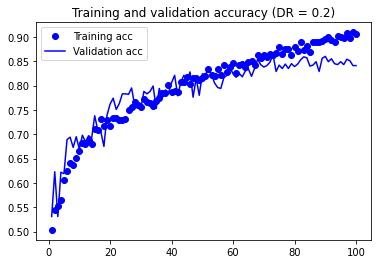

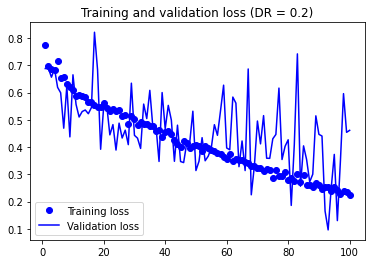

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (DR = 0.2)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (DR = 0.2)')
plt.legend()
plt.show()

In [16]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test'

test_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test_generator)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


[0.07090520858764648, 0.8389999866485596]

1. the loss reduce a lot 
2. accuracy increase a little bit
3. 0.2 dropout rate is a little bit small, since the accuracy curve of training data is above the validation curve. try 0.3 next time
4. we can still try more epochs
5. how can improve the accuracy to 95%? maybe increase the conv2D layers or change the depth of each conv2D layers' weight to get more trainable parameters.